In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.ensemble import BalancedBaggingClassifier
%matplotlib inline

In [2]:
df= pd.read_csv('Payment_Data.csv')
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [3]:
df.shape

(39221, 8)

In [4]:
df.label.value_counts()

0    38661
1      560
Name: label, dtype: int64

In [5]:
df.Category.value_counts()

shopping       13328
food           12964
electronics    12834
Name: Category, dtype: int64

In [6]:
df.paymentMethod.value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [7]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [9]:
df1=df[ (df["Category"].isnull()==True)]
df1.label.value_counts()

0    87
1     8
Name: label, dtype: int64

In [10]:

df.drop(["isWeekend"],axis=1,inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB


In [11]:
df.dropna(inplace=True)

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded.drop(["Category","paymentMethod"], axis=1,inplace=True)

# Display the resulting dataframe
df_encoded.dropna(inplace=True)


In [13]:
df_encoded.label.value_counts()

0.0    38480
1.0      552
Name: label, dtype: int64

In [14]:
standard_scaler = StandardScaler()
columns_to_normalize = ['accountAgeDays','numItems', 'paymentMethodAgeDays']
data_standard_scaled = standard_scaler.fit_transform(df_encoded[columns_to_normalize])
df_scaled = pd.DataFrame(data_standard_scaled, columns=columns_to_normalize, index=df_encoded.index)
df_encoded[columns_to_normalize] = df_scaled
df_encoded.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,3.903200e+04,3.903200e+04,39032.000000,3.903200e+04,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000
mean,4.030958e-16,-1.283845e-16,4.748370,-8.505983e-16,0.014142,0.714106,0.236934,0.048960,0.328218,0.331497,0.340285
std,1.000013e+00,1.000013e+00,0.389058,1.000013e+00,0.118079,0.451845,0.425207,0.215787,0.469571,0.470757,0.473811
min,-1.064204e+00,-1.491707e-01,0.421214,-4.326221e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.759931e-01,-1.491707e-01,4.742303,-4.326221e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.162767e-01,-1.491707e-01,4.886641,-4.325780e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.177092e+00,-1.491707e-01,4.962055,-1.238150e-01,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.419361e+00,4.916360e+01,5.040929,6.621883e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
x=df_encoded.loc[:,df_encoded.columns != 'label']
y=df_encoded.loc[:,df_encoded.columns=='label']
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39032 entries, 0 to 39125
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39032 non-null  float64
 1   numItems                   39032 non-null  float64
 2   localTime                  39032 non-null  float64
 3   paymentMethodAgeDays       39032 non-null  float64
 4   paymentMethod_creditcard   39032 non-null  float64
 5   paymentMethod_paypal       39032 non-null  float64
 6   paymentMethod_storecredit  39032 non-null  float64
 7   Category_electronics       39032 non-null  float64
 8   Category_food              39032 non-null  float64
 9   Category_shopping          39032 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:

from imblearn.over_sampling import SMOTE
from collections import Counter

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
 
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))
y_train_resampled.value_counts()

Class distribution before SMOTE: Counter({'label': 1})
Class distribution after SMOTE: Counter({'label': 1})


label
0.0      26913
1.0      26913
dtype: int64

In [18]:
# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression

# 2.Initilize
model = LogisticRegression(class_weight="balanced",max_iter=200)

# 3.train
#model.fit(X_train_resampled,y_train_resampled)

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Choose between L1 or L2 regularization
     'solver':['lbfgs','newton-cholesky','liblinear'] 
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='f1_macro')  # 5-fold cross-validation

# Fit the grid search to your training data (X_train, y_train)
grid_search.fit(X_train_resampled,np.ravel(np.array(y_train_resampled)))

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model for prediction on new data
y_pred = best_model.predict(X_test)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a tota

In [19]:
# Print the best parameters found
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}


[[10521  1046]
 [    0   143]]


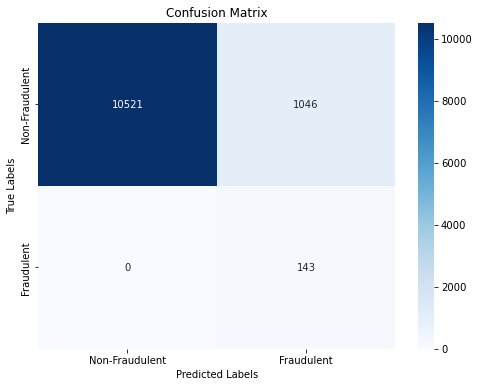

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

classes = ['Non-Fraudulent', 'Fraudulent']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.2147147147147147
0.9106746370623399


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     11567
         1.0       0.12      1.00      0.21       143

    accuracy                           0.91     11710
   macro avg       0.56      0.95      0.58     11710
weighted avg       0.99      0.91      0.94     11710

